/home/lab5/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257


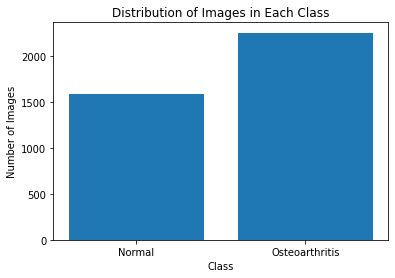

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Create a histogram to visualize the distribution of images in each class
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


2024-03-24 09:30:51.766627: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 09:30:51.993977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 09:30:52.452063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257
Number of images in Normal class after augmentation: 2257


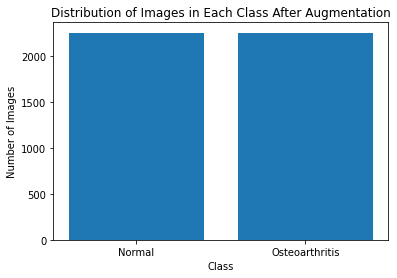

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Check if data augmentation is needed
if len(normal_images) < len(osteoarthritis_images):
    # Calculate the number of additional images needed
    num_additional_images = len(osteoarthritis_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

# Create a histogram to visualize the distribution of images in each class after augmentation
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [3]:
import random

# Set a seed for reproducibility
random.seed(42)

# Randomly select 1000 images from each class
selected_normal_images = random.sample(normal_images, 500)
selected_osteoarthritis_images = random.sample(osteoarthritis_images, 500)

# Combine selected images from both classes
selected_images = selected_normal_images + selected_osteoarthritis_images
labels = [0] * 500 + [1] * 500  # Assign labels (0 for Normal, 1 for Osteoarthritis)

# Split the selected images and labels into train and test sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_images, labels, test_size=0.3, random_state=42)

# Split the train set into train and validation sets (80:20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of train, test, and validation sets
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("X_validation size:", len(X_val))


X_train size: 560
X_test size: 300
X_validation size: 140


In [4]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef

VGG16

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define a function to preprocess images
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Resize image to (224, 224)
        resized_img = cv2.resize(img, (224, 224))
        # Convert the image to array and apply preprocessing specific to VGG16
        processed_img = preprocess_input(resized_img)
        processed_images.append(processed_img)
    return np.array(processed_images)

# Preprocess train, validation, and test images
X_train_preprocessed = preprocess_images(X_train)
X_val_preprocessed = preprocess_images(X_val)
X_test_preprocessed = preprocess_images(X_test)


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4849 - loss: 1.2574 - val_accuracy: 0.5071 - val_loss: 0.8755
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5523 - loss: 0.7559 - val_accuracy: 0.6071 - val_loss: 0.7052
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6539 - loss: 0.6466 - val_accuracy: 0.6357 - val_loss: 0.6376
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6685 - loss: 0.5873 - val_accuracy: 0.6857 - val_loss: 0.5911
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7448 - loss: 0.5236 - val_accuracy: 0.6929 - val_loss: 0.5585
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7471 - loss: 0.5036 - val_accuracy: 0.7500 - val_loss: 0.5227
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7780 - loss: 0.4682 - val_accuracy: 0.7429 - val_loss: 0.5057
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7695 - loss: 0.4717 - val_accuracy: 0.7429 - val_loss:

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


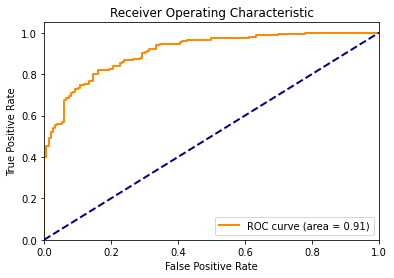

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3850062273090472
Validation Loss: 0.4266060925573921
Training Time (seconds): 624.4956030845642
Inference Time (seconds): 11.466212272644043
Validation Accuracy: 0.7357142857142858
Test Accuracy: 0.8166666666666667
Confusion Matrix:
 [[122  28]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       150
           1       0.81      0.82      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.9088444444444446
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8974 - loss: 0.2792 - val_accuracy: 0.7929 - val_loss: 0.4256
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8898 - loss: 0.2735 - val_accuracy: 0.7571 - val_loss: 0.4249
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9179 - loss: 0.2564 - val_accuracy: 0.7500 - val_loss: 0.4212
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9270 - loss: 0.2468 - val_accuracy: 0.7643 - val_loss: 0.4179
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9168 - loss: 0.2625 - val_accuracy: 0.7571 - val_loss: 0.4176
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9130 - loss: 0.2703 - val_accuracy: 0.7571 - val_loss: 0.4176
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9215 - loss: 0.2357 - val_accuracy: 0.7643 - val_loss: 0.4185
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9253 - loss: 0.2376 - val_accuracy: 0.7571 - v

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


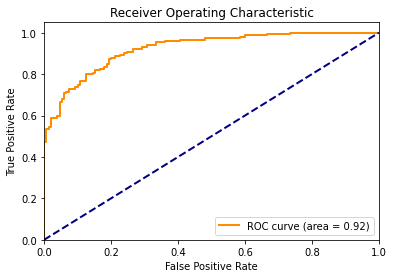

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3572345429020534
Validation Loss: 0.41477665061472574
Training Time (seconds): 422.9213037490845
Inference Time (seconds): 11.37931752204895
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.8266666666666667
Confusion Matrix:
 [[128  22]
 [ 30 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.85      0.80      0.82       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9229777777777778
Metrics saved successfully


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9427 - loss: 0.2236 - val_accuracy: 0.8000 - val_loss: 0.4130
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9354 - loss: 0.2042 - val_accuracy: 0.7643 - val_loss: 0.4180
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9367 - loss: 0.2142 - val_accuracy: 0.8143 - val_loss: 0.4127
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9533 - loss: 0.1945 - val_accuracy: 0.7714 - val_loss: 0.4189
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9497 - loss: 0.1923 - val_accuracy: 0.7786 - val_loss: 0.4144
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9459 - loss: 0.2095 - val_accuracy: 0.7714 - val_loss: 0.4211
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9605 - loss: 0.1861 - val_accuracy: 0.8000 - val_loss: 0.4160
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9532 - loss: 0.1848 - val_accuracy: 0.7857 - v

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


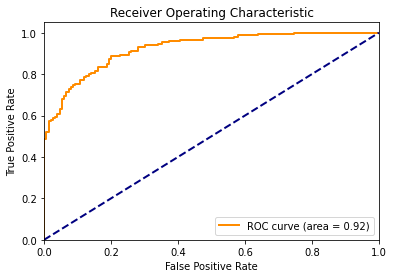

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3559667189974625
Validation Loss: 0.41954218340014976
Training Time (seconds): 211.65985941886902
Inference Time (seconds): 11.319788694381714
Validation Accuracy: 0.8142857142857143
Test Accuracy: 0.8333333333333334
Confusion Matrix:
 [[131  19]
 [ 31 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.86      0.79      0.83       150

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

ROC AUC Score: 0.9238666666666667
Metrics saved successfully


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9521 - loss: 0.1972 - val_accuracy: 0.7786 - val_loss: 0.4145
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9542 - loss: 0.2035 - val_accuracy: 0.8000 - val_loss: 0.4145
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9460 - loss: 0.2023 - val_accuracy: 0.7714 - val_loss: 0.4200
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9539 - loss: 0.1874 - val_accuracy: 0.7714 - val_loss: 0.4213
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9474 - loss: 0.1909 - val_accuracy: 0.7786 - val_loss: 0.4288
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9615 - loss: 0.1757 - val_accuracy: 0.7786 - val_loss: 0.4218
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9618 - loss: 0.1625 - val_accuracy: 0.7929 - val_loss: 0.4196
Training Time: 184.93458151817322 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


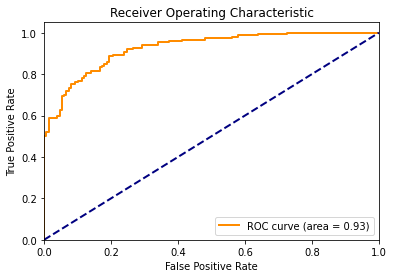

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.350412855228019
Validation Loss: 0.42011827995266243
Training Time (seconds): 184.93458151817322
Inference Time (seconds): 11.393307447433472
Validation Accuracy: 0.8
Test Accuracy: 0.8366666666666667
Confusion Matrix:
 [[131  19]
 [ 30 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.86      0.80      0.83       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

ROC AUC Score: 0.9257333333333334
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dense(128, activation='relu')(x)   # Additional dense layer
x = Dense(64, activation='relu')(x)    # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,887,233 (56.79 MB)

 Trainable params: 172,545 (674.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5626 - loss: 0.7468 - val_accuracy: 0.6929 - val_loss: 0.6122
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6629 - loss: 0.6022 - val_accuracy: 0.6786 - val_loss: 0.5645
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7236 - loss: 0.5394 - val_accuracy: 0.7071 - val_loss: 0.5475
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7924 - loss: 0.4925 - val_accuracy: 0.7214 - val_loss: 0.5101
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7940 - loss: 0.4717 - val_accuracy: 0.7571 - val_loss: 0.5033
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8064 - loss: 0.4242 - val_accuracy: 0.7643 - val_loss: 0.4897
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8391 - loss: 0.3962 - val_accuracy: 0.7500 - val_loss: 0.4683
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8491 - loss: 0.3661 - val_accuracy: 0.7571 - val_loss:

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


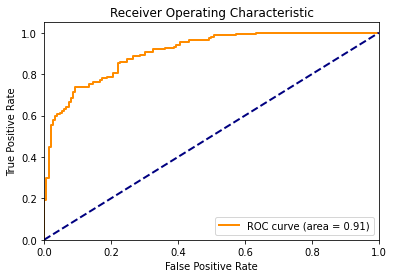

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.38494110950832433
Validation Loss: 0.44089070274252185
Training Time (seconds): 488.52567982673645
Inference Time (seconds): 11.47175908088684
Validation Accuracy: 0.7785714285714286
Test Accuracy: 0.8
Confusion Matrix:
 [[122  28]
 [ 32 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       150
           1       0.81      0.79      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

ROC AUC Score: 0.9060444444444444
Metrics saved successfully


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9081 - loss: 0.2516 - val_accuracy: 0.7571 - val_loss: 0.4296
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9345 - loss: 0.2221 - val_accuracy: 0.7500 - val_loss: 0.4241
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9376 - loss: 0.2029 - val_accuracy: 0.7500 - val_loss: 0.4308
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9471 - loss: 0.1959 - val_accuracy: 0.7286 - val_loss: 0.4980
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9496 - loss: 0.2045 - val_accuracy: 0.7571 - val_loss: 0.4515
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9467 - loss: 0.1999 - val_accuracy: 0.7643 - val_loss: 0.4308
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9405 - loss: 0.1874 - val_accuracy: 0.7643 - val_loss: 0.4382
Training Time: 184.99614644050598 seconds


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


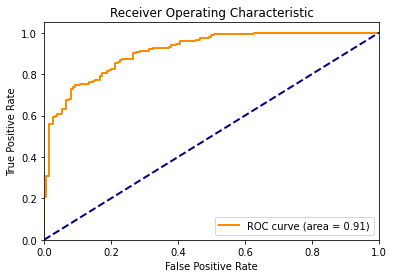

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.369806984680263
Validation Loss: 0.4405751022217213
Training Time (seconds): 184.99614644050598
Inference Time (seconds): 11.308814525604248
Validation Accuracy: 0.75
Test Accuracy: 0.81
Confusion Matrix:
 [[121  29]
 [ 28 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       150
           1       0.81      0.81      0.81       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

ROC AUC Score: 0.9126666666666666
Metrics saved successfully


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [28]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9196 - loss: 0.2256 - val_accuracy: 0.7714 - val_loss: 0.4286
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9175 - loss: 0.2220 - val_accuracy: 0.7571 - val_loss: 0.4255
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9405 - loss: 0.1984 - val_accuracy: 0.7714 - val_loss: 0.4295
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9516 - loss: 0.1809 - val_accuracy: 0.7500 - val_loss: 0.4312
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9634 - loss: 0.1649 - val_accuracy: 0.7571 - val_loss: 0.4391
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9662 - loss: 0.1623 - val_accuracy: 0.7643 - val_loss: 0.4404
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9681 - loss: 0.1463 - val_accuracy: 0.7643 - val_loss: 0.4433
Training Time: 185.1767499446869 seconds


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


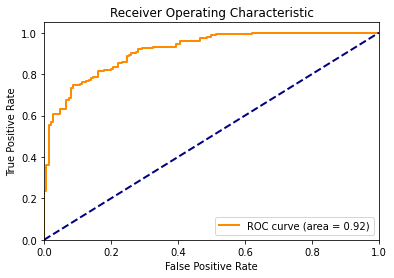

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.363126794791642
Validation Loss: 0.4424565589506566
Training Time (seconds): 185.1767499446869
Inference Time (seconds): 11.32440972328186
Validation Accuracy: 0.7571428571428571
Test Accuracy: 0.8233333333333334
Confusion Matrix:
 [[125  25]
 [ 28 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       150
           1       0.83      0.81      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.915511111111111
Metrics saved successfully


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9406 - loss: 0.1945 - val_accuracy: 0.7786 - val_loss: 0.4273
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9405 - loss: 0.1916 - val_accuracy: 0.7500 - val_loss: 0.4316
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9686 - loss: 0.1829 - val_accuracy: 0.7643 - val_loss: 0.4285
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9658 - loss: 0.1643 - val_accuracy: 0.7500 - val_loss: 0.4342
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9651 - loss: 0.1430 - val_accuracy: 0.7571 - val_loss: 0.4626
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9741 - loss: 0.1405 - val_accuracy: 0.7643 - val_loss: 0.4455
Training Time: 158.6984100341797 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


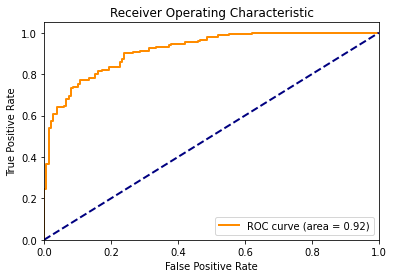

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.36584097384145425
Validation Loss: 0.44580098237769633
Training Time (seconds): 158.6984100341797
Inference Time (seconds): 11.3766770362854
Validation Accuracy: 0.7785714285714286
Test Accuracy: 0.8133333333333334
Confusion Matrix:
 [[127  23]
 [ 33 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.84      0.78      0.81       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

ROC AUC Score: 0.9159111111111111
Metrics saved successfully


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense+Dropout

In [33]:
from tensorflow.keras.layers import Dropout

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
x = Dense(128, activation='relu')(x)  # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)   # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5266 - loss: 0.9486 - val_accuracy: 0.5786 - val_loss: 0.6701
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5702 - loss: 0.8248 - val_accuracy: 0.6786 - val_loss: 0.6186
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5834 - loss: 0.7995 - val_accuracy: 0.7000 - val_loss: 0.6244
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6194 - loss: 0.7192 - val_accuracy: 0.7214 - val_loss: 0.5990
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6410 - loss: 0.7012 - val_accuracy: 0.7357 - val_loss: 0.5954
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6396 - loss: 0.6332 - val_accuracy: 0.7429 - val_loss: 0.5655
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6860 - loss: 0.6177 - val_accuracy: 0.7286 - val_loss: 0.5482
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6957 - loss: 0.5911 - val_accuracy: 0.7214 - val_loss:

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


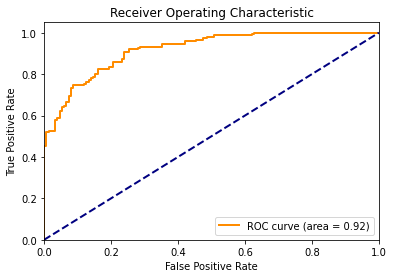

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3541322902545918
Validation Loss: 0.4286721375706908
Training Time (seconds): 1307.2145965099335
Inference Time (seconds): 11.516053915023804
Validation Accuracy: 0.7857142857142857
Test Accuracy: 0.8133333333333334
Confusion Matrix:
 [[119  31]
 [ 25 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.80      0.83      0.82       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

ROC AUC Score: 0.9186222222222222
Metrics saved successfully


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curvefrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [37]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8859 - loss: 0.2767 - val_accuracy: 0.7571 - val_loss: 0.4285
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8845 - loss: 0.2692 - val_accuracy: 0.7857 - val_loss: 0.4258
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8833 - loss: 0.2659 - val_accuracy: 0.7571 - val_loss: 0.4424
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8870 - loss: 0.2686 - val_accuracy: 0.7643 - val_loss: 0.4307
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8938 - loss: 0.2631 - val_accuracy: 0.7714 - val_loss: 0.4353
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9054 - loss: 0.2338 - val_accuracy: 0.7714 - val_loss: 0.4469
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9116 - loss: 0.2285 - val_accuracy: 0.7571 - val_loss: 0.4254
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9300 - loss: 0.2232 - val_accuracy: 0.7643 - v

In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


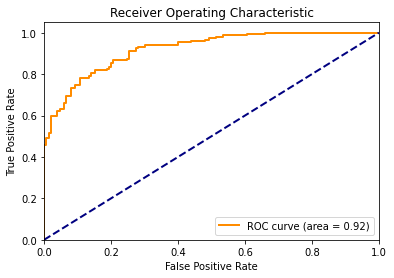

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35217889076811587
Validation Loss: 0.4397175577758331
Training Time (seconds): 317.76237750053406
Inference Time (seconds): 11.424383163452148
Validation Accuracy: 0.7571428571428571
Test Accuracy: 0.8166666666666667
Confusion Matrix:
 [[120  30]
 [ 25 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       150
           1       0.81      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.920088888888889
Metrics saved successfully


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8961 - loss: 0.2417 - val_accuracy: 0.7714 - val_loss: 0.4462
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9292 - loss: 0.2247 - val_accuracy: 0.7786 - val_loss: 0.4365
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9083 - loss: 0.2329 - val_accuracy: 0.7857 - val_loss: 0.4387
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9058 - loss: 0.2292 - val_accuracy: 0.7857 - val_loss: 0.4267
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9303 - loss: 0.1937 - val_accuracy: 0.7714 - val_loss: 0.4466
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9253 - loss: 0.2185 - val_accuracy: 0.7857 - val_loss: 0.4310
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9196 - loss: 0.2220 - val_accuracy: 0.7714 - val_loss: 0.4513
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9246 - loss: 0.1952 - val_accuracy: 0.7643 - v

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


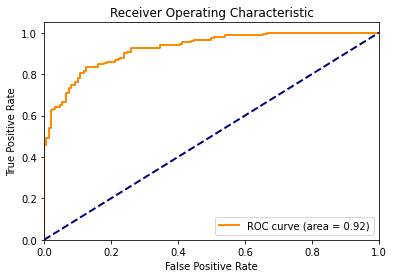

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3438373166200863
Validation Loss: 0.43750291883485437
Training Time (seconds): 238.54035902023315
Inference Time (seconds): 11.419916152954102
Validation Accuracy: 0.7857142857142857
Test Accuracy: 0.84
Confusion Matrix:
 [[127  23]
 [ 25 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       150
           1       0.84      0.83      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

ROC AUC Score: 0.9248444444444444
Metrics saved successfully


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [43]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8980 - loss: 0.2309 - val_accuracy: 0.7714 - val_loss: 0.4406
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9350 - loss: 0.2052 - val_accuracy: 0.7714 - val_loss: 0.4436
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9311 - loss: 0.1892 - val_accuracy: 0.7786 - val_loss: 0.4357
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9073 - loss: 0.2007 - val_accuracy: 0.7929 - val_loss: 0.4278
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9425 - loss: 0.1879 - val_accuracy: 0.7786 - val_loss: 0.4436
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9325 - loss: 0.1867 - val_accuracy: 0.7929 - val_loss: 0.4454
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9264 - loss: 0.1967 - val_accuracy: 0.7929 - val_loss: 0.4357
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9308 - loss: 0.2007 - val_accuracy: 0.7857 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


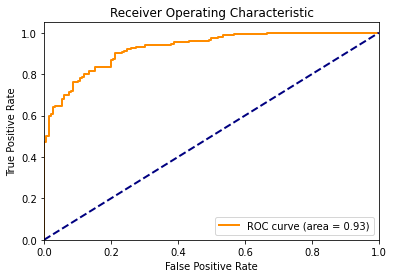

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.34153253025370073
Validation Loss: 0.4400557761449162
Training Time (seconds): 237.88065099716187
Inference Time (seconds): 11.395712852478027
Validation Accuracy: 0.7928571428571428
Test Accuracy: 0.82
Confusion Matrix:
 [[121  29]
 [ 25 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       150
           1       0.81      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.9260444444444444
Metrics saved successfully


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GlobalAveragePooling+Dense

In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)  # Additional Dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [46]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6040 - loss: 0.7387 - val_accuracy: 0.6786 - val_loss: 0.5963
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6950 - loss: 0.5824 - val_accuracy: 0.7214 - val_loss: 0.5530
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7590 - loss: 0.5009 - val_accuracy: 0.7357 - val_loss: 0.5241
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8184 - loss: 0.4350 - val_accuracy: 0.7643 - val_loss: 0.4943
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8507 - loss: 0.4013 - val_accuracy: 0.7357 - val_loss: 0.4688
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8377 - loss: 0.3900 - val_accuracy: 0.7500 - val_loss: 0.4585
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8471 - loss: 0.3614 - val_accuracy: 0.7857 - val_loss: 0.4394
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8571 - loss: 0.3507 - val_accuracy: 0.7929 - val_loss:

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


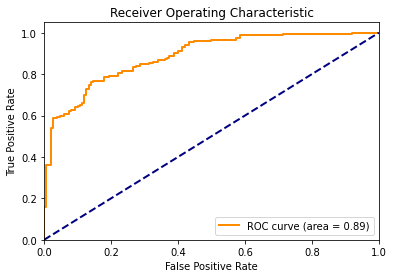

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.4226669123223968
Validation Loss: 0.4177042321162351
Training Time (seconds): 424.21469473838806
Inference Time (seconds): 11.623352766036987
Validation Accuracy: 0.8
Test Accuracy: 0.8
Confusion Matrix:
 [[123  27]
 [ 33 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       150
           1       0.81      0.78      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

ROC AUC Score: 0.8857777777777778
Metrics saved successfully


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [49]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9244 - loss: 0.2708 - val_accuracy: 0.7929 - val_loss: 0.4127
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9235 - loss: 0.2581 - val_accuracy: 0.8000 - val_loss: 0.4117
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9107 - loss: 0.2486 - val_accuracy: 0.8143 - val_loss: 0.4145
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9192 - loss: 0.2491 - val_accuracy: 0.7714 - val_loss: 0.4458
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9234 - loss: 0.2361 - val_accuracy: 0.7857 - val_loss: 0.4338
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9440 - loss: 0.2179 - val_accuracy: 0.8071 - val_loss: 0.4094
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9431 - loss: 0.2127 - val_accuracy: 0.8143 - val_loss: 0.4141
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9460 - loss: 0.1935 - val_accuracy: 0.8143 - v

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


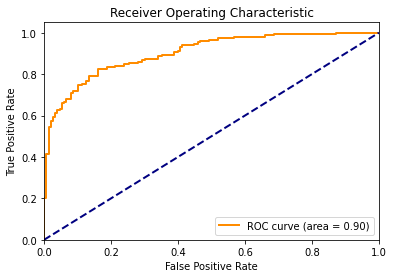

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.40651455792590224
Validation Loss: 0.4100893005111276
Training Time (seconds): 291.42385363578796
Inference Time (seconds): 11.317323446273804
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.82
Confusion Matrix:
 [[133  17]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.87      0.75      0.81       150

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

ROC AUC Score: 0.9023555555555556
Metrics saved successfully


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [52]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9293 - loss: 0.2159 - val_accuracy: 0.8286 - val_loss: 0.4108
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9471 - loss: 0.1856 - val_accuracy: 0.8143 - val_loss: 0.4164
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9626 - loss: 0.1790 - val_accuracy: 0.8214 - val_loss: 0.4147
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9457 - loss: 0.1915 - val_accuracy: 0.8071 - val_loss: 0.4171
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9434 - loss: 0.1716 - val_accuracy: 0.8143 - val_loss: 0.4149
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9675 - loss: 0.1490 - val_accuracy: 0.7857 - val_loss: 0.4376
Training Time: 158.90723419189453 seconds


In [53]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


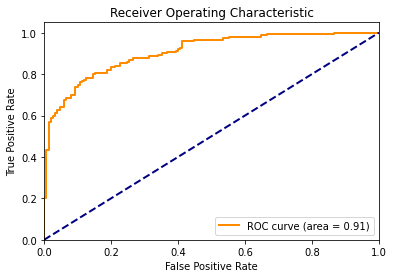

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.38573355465643006
Validation Loss: 0.4083945177098331
Training Time (seconds): 158.90723419189453
Inference Time (seconds): 11.442119121551514
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8266666666666667
Confusion Matrix:
 [[127  23]
 [ 29 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.84      0.81      0.82       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9059999999999999
Metrics saved successfully


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [55]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9559 - loss: 0.1883 - val_accuracy: 0.8000 - val_loss: 0.4240
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9568 - loss: 0.1798 - val_accuracy: 0.8214 - val_loss: 0.4161
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9513 - loss: 0.1793 - val_accuracy: 0.8286 - val_loss: 0.4106
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9513 - loss: 0.1726 - val_accuracy: 0.8000 - val_loss: 0.4251
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9721 - loss: 0.1588 - val_accuracy: 0.8143 - val_loss: 0.4283
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9694 - loss: 0.1504 - val_accuracy: 0.8286 - val_loss: 0.4181
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9666 - loss: 0.1544 - val_accuracy: 0.8143 - val_loss: 0.4254
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9693 - loss: 0.1453 - val_accuracy: 0.8214 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


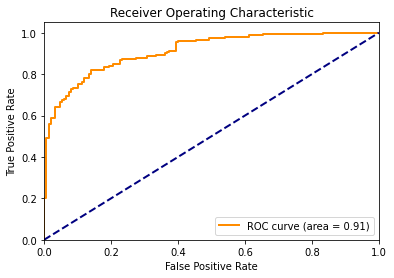

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3767211870550786
Validation Loss: 0.4050456287835719
Training Time (seconds): 211.8648407459259
Inference Time (seconds): 11.39799690246582
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.83
Confusion Matrix:
 [[126  24]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       150
           1       0.84      0.82      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9113333333333334
Metrics saved successfully


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+ Conv2D + GlobalAveragePooling2D +Dropout+ Dense

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Conv2D layer
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)  # Example Conv2D layer

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add Dropout layer
x = Dropout(0.5)(x)  # Example Dropout layer with dropout rate of 0.5

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 128)      │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 15,337,921 (58.51 MB)

 Trainable params: 623,233 (2.38 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [58]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5153 - loss: 1.1846 - val_accuracy: 0.6929 - val_loss: 0.5791
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6016 - loss: 0.7174 - val_accuracy: 0.6857 - val_loss: 0.5424
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7011 - loss: 0.5988 - val_accuracy: 0.7000 - val_loss: 0.5283
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6923 - loss: 0.6014 - val_accuracy: 0.7286 - val_loss: 0.5017
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7847 - loss: 0.4533 - val_accuracy: 0.7500 - val_loss: 0.4636
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7800 - loss: 0.4753 - val_accuracy: 0.7714 - val_loss: 0.4355
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7793 - loss: 0.4595 - val_accuracy: 0.8071 - val_loss: 0.4292
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8149 - loss: 0.4118 - val_accuracy: 0.7643 - val_loss:

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


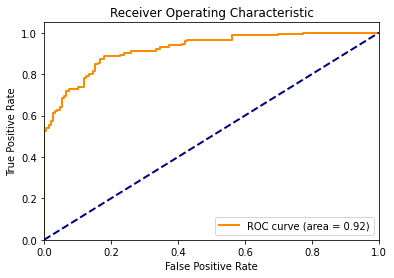

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35532249017916545
Validation Loss: 0.40403571735040533
Training Time (seconds): 505.2017505168915
Inference Time (seconds): 11.484922885894775
Validation Accuracy: 0.8142857142857143
Test Accuracy: 0.8333333333333334
Confusion Matrix:
 [[127  23]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       150
           1       0.84      0.82      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9212888888888889
Metrics saved successfully


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [61]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9071 - loss: 0.2376 - val_accuracy: 0.8429 - val_loss: 0.4000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9149 - loss: 0.2200 - val_accuracy: 0.8286 - val_loss: 0.4173
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8925 - loss: 0.2426 - val_accuracy: 0.8143 - val_loss: 0.4377
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8984 - loss: 0.2056 - val_accuracy: 0.8357 - val_loss: 0.3971
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9190 - loss: 0.1984 - val_accuracy: 0.8286 - val_loss: 0.4038
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9350 - loss: 0.1864 - val_accuracy: 0.8500 - val_loss: 0.3942
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8986 - loss: 0.2288 - val_accuracy: 0.8071 - val_loss: 0.4225
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9400 - loss: 0.1916 - val_accuracy: 0.8286 - v

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


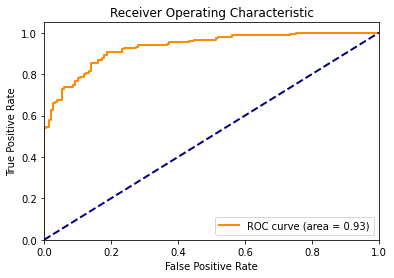

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3355748051138549
Validation Loss: 0.403748693811185
Training Time (seconds): 291.6961534023285
Inference Time (seconds): 11.347980737686157
Validation Accuracy: 0.85
Test Accuracy: 0.8566666666666667
Confusion Matrix:
 [[129  21]
 [ 22 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       150
           1       0.86      0.85      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

ROC AUC Score: 0.9310666666666667
Metrics saved successfully


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [64]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9221 - loss: 0.1842 - val_accuracy: 0.8429 - val_loss: 0.4109
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9420 - loss: 0.1890 - val_accuracy: 0.8143 - val_loss: 0.4373
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9391 - loss: 0.1537 - val_accuracy: 0.8071 - val_loss: 0.4577
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9418 - loss: 0.1462 - val_accuracy: 0.8214 - val_loss: 0.4323
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9411 - loss: 0.1465 - val_accuracy: 0.8214 - val_loss: 0.4307
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9606 - loss: 0.1334 - val_accuracy: 0.8214 - val_loss: 0.4363
Training Time: 159.47144293785095 seconds


In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


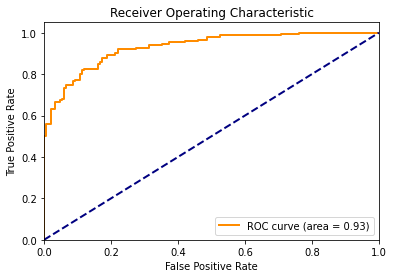

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3425632586250074
Validation Loss: 0.4158961425398256
Training Time (seconds): 159.47144293785095
Inference Time (seconds): 11.461978912353516
Validation Accuracy: 0.8428571428571429
Test Accuracy: 0.8466666666666667
Confusion Matrix:
 [[122  28]
 [ 18 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       150
           1       0.82      0.88      0.85       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

ROC AUC Score: 0.9303111111111111
Metrics saved successfully


In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [67]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9481 - loss: 0.1484 - val_accuracy: 0.8286 - val_loss: 0.4231
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9506 - loss: 0.1500 - val_accuracy: 0.8214 - val_loss: 0.4341
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9414 - loss: 0.1564 - val_accuracy: 0.8143 - val_loss: 0.4318
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9554 - loss: 0.1423 - val_accuracy: 0.8214 - val_loss: 0.4335
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9618 - loss: 0.1245 - val_accuracy: 0.8143 - val_loss: 0.4234
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9472 - loss: 0.1363 - val_accuracy: 0.8214 - val_loss: 0.4247
Training Time: 159.8941445350647 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


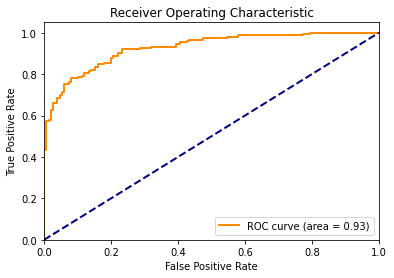

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35153321126004156
Validation Loss: 0.4287138645578082
Training Time (seconds): 159.8941445350647
Inference Time (seconds): 11.537700891494751
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8366666666666667
Confusion Matrix:
 [[124  26]
 [ 23 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       150
           1       0.83      0.85      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

ROC AUC Score: 0.9268888888888889
Metrics saved successfully


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/Downloads/Cancer1/normal')
ulcer_images = load_and_resize_images_from_folder('/home/lab5/Downloads/Cancer1/ulcer')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in ulcer class:", len(ulcer_images))

# Check if data augmentation is needed
if len(normal_images) < len(ulcer_images):
    # Calculate the number of additional images needed
    num_additional_images = len(ulcer_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

sns.histplot(df['labels'])
plt.title('Histogram for labels')
plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('Count')
plt.grid()
plt.show()

plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+LSTM+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM, Reshape  # Import Reshape layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from images using VGG16
vgg_output = base_model.output

# Add GlobalAveragePooling2D layer to pool spatial features
x = GlobalAveragePooling2D()(vgg_output)

# Reshape features for LSTM input
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM input

# Add LSTM layer
x = LSTM(128)(x)

# Add Dense layers for classification
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with LSTM and Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 15,076,161 (57.51 MB)

 Trainable params: 361,473 (1.38 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5188 - loss: 0.6915 - val_accuracy: 0.6571 - val_loss: 0.6693
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6882 - loss: 0.6493 - val_accuracy: 0.6214 - val_loss: 0.6505
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7534 - loss: 0.6180 - val_accuracy: 0.6429 - val_loss: 0.6175
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7563 - loss: 0.5805 - val_accuracy: 0.6714 - val_loss: 0.5915
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7916 - loss: 0.5308 - val_accuracy: 0.6929 - val_loss: 0.5583
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7918 - loss: 0.5021 - val_accuracy: 0.6929 - val_loss: 0.5400
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8242 - loss: 0.4506 - val_accuracy: 0.7357 - val_loss: 0.5043
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8274 - loss: 0.4179 - val_accuracy: 0.7500 - val_loss:

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


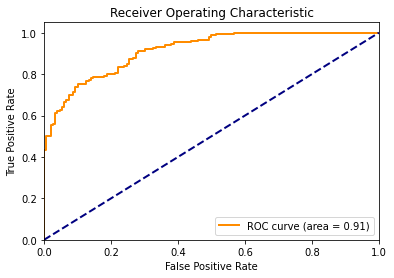

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.36842663579371365
Validation Loss: 0.4101047802838916
Training Time (seconds): 569.825291633606
Inference Time (seconds): 11.593092918395996
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.8
Confusion Matrix:
 [[114  36]
 [ 24 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       150
           1       0.78      0.84      0.81       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

ROC AUC Score: 0.9140444444444444
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9437 - loss: 0.2095 - val_accuracy: 0.7786 - val_loss: 0.4225
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9474 - loss: 0.1950 - val_accuracy: 0.8000 - val_loss: 0.4227
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9504 - loss: 0.1854 - val_accuracy: 0.8000 - val_loss: 0.4204
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9364 - loss: 0.1930 - val_accuracy: 0.8000 - val_loss: 0.4313
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9508 - loss: 0.1613 - val_accuracy: 0.8000 - val_loss: 0.4274
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9576 - loss: 0.1762 - val_accuracy: 0.8000 - val_loss: 0.4214
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9629 - loss: 0.1615 - val_accuracy: 0.8000 - val_loss: 0.4327
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9746 - loss: 0.1359 - val_accuracy: 0.7714 - v

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


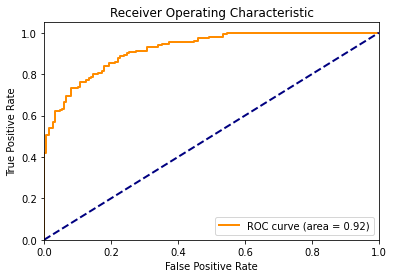

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3564837674427583
Validation Loss: 0.41213040314430277
Training Time (seconds): 212.40547251701355
Inference Time (seconds): 11.348596572875977
Validation Accuracy: 0.8
Test Accuracy: 0.8233333333333334
Confusion Matrix:
 [[121  29]
 [ 24 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       150
           1       0.81      0.84      0.83       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.9204888888888889
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9552 - loss: 0.1909 - val_accuracy: 0.8000 - val_loss: 0.4243
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9536 - loss: 0.1892 - val_accuracy: 0.8000 - val_loss: 0.4244
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9658 - loss: 0.1793 - val_accuracy: 0.7857 - val_loss: 0.4249
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9697 - loss: 0.1499 - val_accuracy: 0.7929 - val_loss: 0.4265
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9860 - loss: 0.1307 - val_accuracy: 0.8214 - val_loss: 0.4402
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9736 - loss: 0.1487 - val_accuracy: 0.8071 - val_loss: 0.4301
Training Time: 159.09723210334778 seconds


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


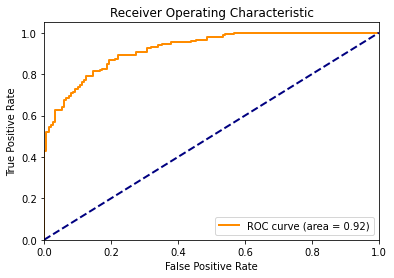

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35624665033843916
Validation Loss: 0.4155513828216134
Training Time (seconds): 159.09723210334778
Inference Time (seconds): 11.363306045532227
Validation Accuracy: 0.8
Test Accuracy: 0.8333333333333334
Confusion Matrix:
 [[121  29]
 [ 21 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       150
           1       0.82      0.86      0.84       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9208
Metrics saved successfully


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9613 - loss: 0.1575 - val_accuracy: 0.7929 - val_loss: 0.4254
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9661 - loss: 0.1465 - val_accuracy: 0.7929 - val_loss: 0.4233
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9718 - loss: 0.1482 - val_accuracy: 0.8000 - val_loss: 0.4323
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9675 - loss: 0.1491 - val_accuracy: 0.7786 - val_loss: 0.4454
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9725 - loss: 0.1307 - val_accuracy: 0.7786 - val_loss: 0.4438
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9768 - loss: 0.1218 - val_accuracy: 0.8071 - val_loss: 0.4334
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9856 - loss: 0.1125 - val_accuracy: 0.7857 - val_loss: 0.4414
Training Time: 185.6178686618805 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


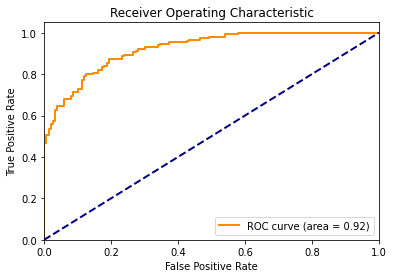

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35132086592151535
Validation Loss: 0.41434193410611797
Training Time (seconds): 185.6178686618805
Inference Time (seconds): 11.392477035522461
Validation Accuracy: 0.7928571428571428
Test Accuracy: 0.8266666666666667
Confusion Matrix:
 [[124  26]
 [ 26 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.83      0.83      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9220444444444444
Metrics saved successfully


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GRU+Dense

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4921 - loss: 1.1947 - val_accuracy: 0.4786 - val_loss: 0.8077
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5789 - loss: 0.7091 - val_accuracy: 0.6429 - val_loss: 0.6320
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6374 - loss: 0.6064 - val_accuracy: 0.7071 - val_loss: 0.5848
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7270 - loss: 0.5273 - val_accuracy: 0.7000 - val_loss: 0.5538
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7619 - loss: 0.4837 - val_accuracy: 0.7286 - val_loss: 0.5130
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7841 - loss: 0.4703 - val_accuracy: 0.7571 - val_loss: 0.4887
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7795 - loss: 0.4593 - val_accuracy: 0.7500 - val_loss: 0.4796
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8070 - loss: 0.4019 - val_accuracy: 0.7929 - val_loss:

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


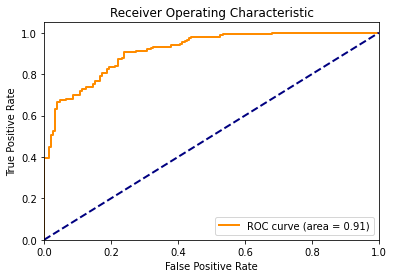

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.36934530954022365
Validation Loss: 0.38913350704866917
Training Time (seconds): 918.7726094722748
Inference Time (seconds): 11.570770740509033
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.8133333333333334
Confusion Matrix:
 [[124  26]
 [ 30 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.82      0.80      0.81       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

ROC AUC Score: 0.9138666666666667
Metrics saved successfully


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9558 - loss: 0.2036 - val_accuracy: 0.8143 - val_loss: 0.3705
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9408 - loss: 0.2103 - val_accuracy: 0.8214 - val_loss: 0.3781
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9471 - loss: 0.2082 - val_accuracy: 0.8000 - val_loss: 0.3731
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9530 - loss: 0.1919 - val_accuracy: 0.8143 - val_loss: 0.3905
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9461 - loss: 0.1905 - val_accuracy: 0.8143 - val_loss: 0.3771
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9609 - loss: 0.1805 - val_accuracy: 0.8143 - val_loss: 0.3736
Training Time: 159.1860475540161 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


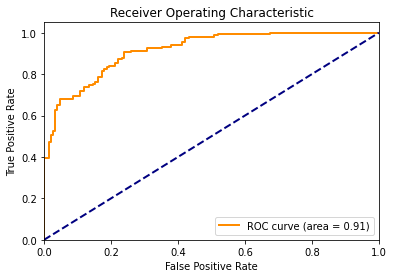

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.36583311261675777
Validation Loss: 0.3883290699596135
Training Time (seconds): 159.1860475540161
Inference Time (seconds): 11.59697413444519
Validation Accuracy: 0.8142857142857143
Test Accuracy: 0.82
Confusion Matrix:
 [[123  27]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       150
           1       0.82      0.82      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.9149333333333334
Metrics saved successfully


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9443 - loss: 0.2126 - val_accuracy: 0.8143 - val_loss: 0.3726
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9546 - loss: 0.1926 - val_accuracy: 0.8286 - val_loss: 0.3824
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9613 - loss: 0.1820 - val_accuracy: 0.8000 - val_loss: 0.3960
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9659 - loss: 0.1926 - val_accuracy: 0.8143 - val_loss: 0.3779
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9664 - loss: 0.1710 - val_accuracy: 0.8143 - val_loss: 0.3737
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9637 - loss: 0.1850 - val_accuracy: 0.8071 - val_loss: 0.3745
Training Time: 158.80678606033325 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


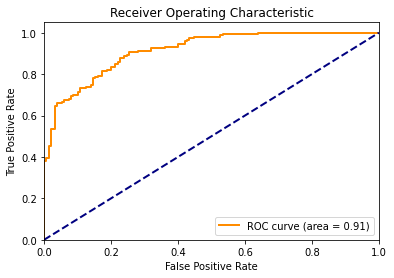

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.36552825523289995
Validation Loss: 0.39071350138499
Training Time (seconds): 158.80678606033325
Inference Time (seconds): 11.388293266296387
Validation Accuracy: 0.8142857142857143
Test Accuracy: 0.8166666666666667
Confusion Matrix:
 [[122  28]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       150
           1       0.81      0.82      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.9142666666666667
Metrics saved successfully


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9544 - loss: 0.1912 - val_accuracy: 0.8286 - val_loss: 0.3865
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9458 - loss: 0.1942 - val_accuracy: 0.8071 - val_loss: 0.3798
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9570 - loss: 0.1908 - val_accuracy: 0.8143 - val_loss: 0.3874
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9684 - loss: 0.1832 - val_accuracy: 0.8143 - val_loss: 0.3936
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9660 - loss: 0.1827 - val_accuracy: 0.8071 - val_loss: 0.3767
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9646 - loss: 0.1719 - val_accuracy: 0.8143 - val_loss: 0.3889
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9656 - loss: 0.1677 - val_accuracy: 0.8143 - val_loss: 0.3851
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9764 - loss: 0.1602 - val_accuracy: 0.8143 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


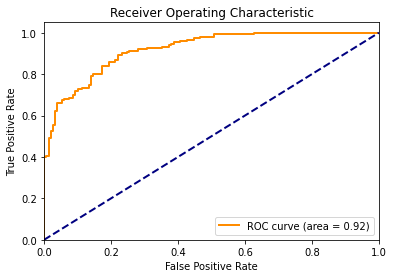

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35593984075202395
Validation Loss: 0.3928474970427956
Training Time (seconds): 264.805463552475
Inference Time (seconds): 11.453564882278442
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.8266666666666667
Confusion Matrix:
 [[122  28]
 [ 24 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       150
           1       0.82      0.84      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9188444444444445
Metrics saved successfully


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Attention Mechanism+Dense

In [38]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Attention, Concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Reshape to add a third dimension
x = Reshape((1, -1))(x)

# Apply attention mechanism
att = Attention()([x, x])

# Reshape the attention output to match the original shape
att = Reshape((-1,))(att)

# Reshape the second tensor to match the shape of the first tensor
att = Reshape((1, -1))(att)

# Concatenate attention weights with original features
x = Concatenate()([x, att])

# Reshape back to 2D
x = Reshape((-1,))(x)

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer_7[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 14, 14,    │  2,359,808 │ block5_conv1[0][

 Total params: 14,977,345 (57.13 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [39]:
# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5970 - loss: 0.7860 - val_accuracy: 0.6714 - val_loss: 0.6065
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7351 - loss: 0.5189 - val_accuracy: 0.7000 - val_loss: 0.5102
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8070 - loss: 0.4405 - val_accuracy: 0.7000 - val_loss: 0.4804
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8233 - loss: 0.3994 - val_accuracy: 0.7357 - val_loss: 0.4595
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8552 - loss: 0.3572 - val_accuracy: 0.7500 - val_loss: 0.4677
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8502 - loss: 0.3329 - val_accuracy: 0.7714 - val_loss: 0.4356
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8763 - loss: 0.3175 - val_accuracy: 0.7929 - val_loss: 0.4255
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8972 - loss: 0.2795 - val_accuracy: 0.7857 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


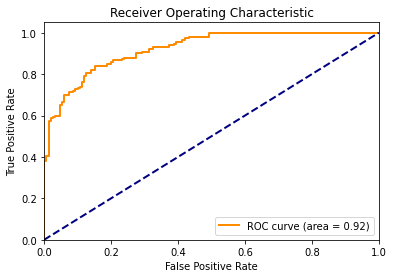

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.34902052504474845
Validation Loss: 0.41422178933665854
Training Time (seconds): 544.2220826148987
Inference Time (seconds): 11.560550928115845
Validation Accuracy: 0.7857142857142857
Test Accuracy: 0.84
Confusion Matrix:
 [[129  21]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       150
           1       0.85      0.82      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

ROC AUC Score: 0.9221333333333332
Metrics saved successfully


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [41]:
# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9376 - loss: 0.1925 - val_accuracy: 0.7571 - val_loss: 0.4746
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9467 - loss: 0.1943 - val_accuracy: 0.7786 - val_loss: 0.4359
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9571 - loss: 0.1665 - val_accuracy: 0.8071 - val_loss: 0.4132
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9484 - loss: 0.1714 - val_accuracy: 0.7786 - val_loss: 0.4219
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9546 - loss: 0.1571 - val_accuracy: 0.7857 - val_loss: 0.4315
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9621 - loss: 0.1597 - val_accuracy: 0.7857 - val_loss: 0.4497
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9687 - loss: 0.1522 - val_accuracy: 0.8000 - val_loss: 0.4338
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9802 - loss: 0.1430 - val_accuracy: 0.7786 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


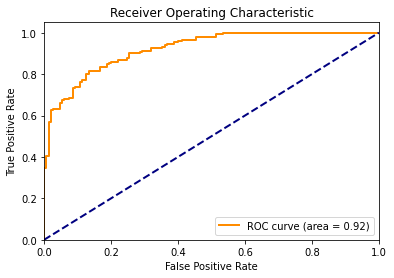

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.35950137092743795
Validation Loss: 0.4189230949135838
Training Time (seconds): 212.04618644714355
Inference Time (seconds): 11.421530485153198
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.8233333333333334
Confusion Matrix:
 [[134  16]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.88      0.75      0.81       150

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

ROC AUC Score: 0.9217333333333334
Metrics saved successfully


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [43]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9583 - loss: 0.1670 - val_accuracy: 0.8000 - val_loss: 0.4194
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9641 - loss: 0.1704 - val_accuracy: 0.7857 - val_loss: 0.4258
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9547 - loss: 0.1682 - val_accuracy: 0.7929 - val_loss: 0.4198
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9807 - loss: 0.1447 - val_accuracy: 0.7857 - val_loss: 0.4231
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9906 - loss: 0.1324 - val_accuracy: 0.7929 - val_loss: 0.4430
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9709 - loss: 0.1366 - val_accuracy: 0.7857 - val_loss: 0.4443
Training Time: 159.0622079372406 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


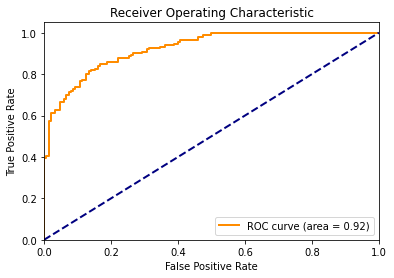

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3559119703718612
Validation Loss: 0.42427646941992075
Training Time (seconds): 159.0622079372406
Inference Time (seconds): 11.409828901290894
Validation Accuracy: 0.8
Test Accuracy: 0.83
Confusion Matrix:
 [[134  16]
 [ 35 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.88      0.77      0.82       150

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

ROC AUC Score: 0.9236
Metrics saved successfully


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [45]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])


# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9512 - loss: 0.1794 - val_accuracy: 0.7929 - val_loss: 0.4272
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9689 - loss: 0.1501 - val_accuracy: 0.7571 - val_loss: 0.5016
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9505 - loss: 0.1701 - val_accuracy: 0.7714 - val_loss: 0.4530
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9668 - loss: 0.1446 - val_accuracy: 0.7786 - val_loss: 0.4505
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9769 - loss: 0.1467 - val_accuracy: 0.7929 - val_loss: 0.4278
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9745 - loss: 0.1284 - val_accuracy: 0.8000 - val_loss: 0.4305
Training Time: 159.0007357597351 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


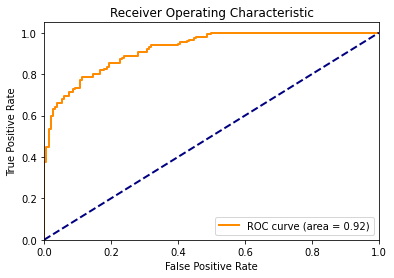

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3489768509271089
Validation Loss: 0.4299621684819848
Training Time (seconds): 159.0007357597351
Inference Time (seconds): 11.375374794006348
Validation Accuracy: 0.7928571428571428
Test Accuracy: 0.8266666666666667
Confusion Matrix:
 [[121  29]
 [ 23 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       150
           1       0.81      0.85      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9219999999999999
Metrics saved successfully


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Capsule+Dense

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Capsule Network
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((-1, 512))(x)  # Reshape to 3D tensor for Capsule Network
x = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
x = Flatten()(x)  # Flatten the output
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        81,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,817,345 (56.52 MB)

 Trainable params: 102,657 (401.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6108 - loss: 0.6715 - val_accuracy: 0.6000 - val_loss: 0.6572
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6834 - loss: 0.5816 - val_accuracy: 0.7429 - val_loss: 0.5304
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7986 - loss: 0.4683 - val_accuracy: 0.7286 - val_loss: 0.5003
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7941 - loss: 0.4243 - val_accuracy: 0.7571 - val_loss: 0.4711
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8229 - loss: 0.3644 - val_accuracy: 0.7929 - val_loss: 0.4371
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8605 - loss: 0.3065 - val_accuracy: 0.7429 - val_loss: 0.5131
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8740 - loss: 0.2804 - val_accuracy: 0.8071 - val_loss: 0.4504
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8745 - loss: 0.2921 - val_accuracy: 0.7786 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 843ms/step


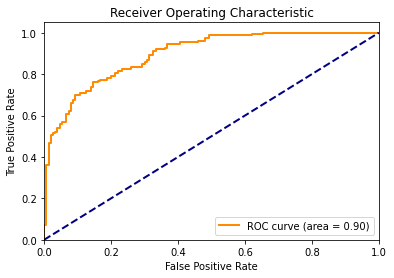

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 790ms/step
Test Loss: 0.41064814027524543
Validation Loss: 0.42995856878964395
Training Time (seconds): 259.83679270744324
Inference Time (seconds): 8.578414916992188
Validation Accuracy: 0.7928571428571428
Test Accuracy: 0.8
Confusion Matrix:
 [[125  25]
 [ 35 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.82      0.77      0.79       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

ROC AUC Score: 0.8954666666666666
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8402 - loss: 0.3133 - val_accuracy: 0.7429 - val_loss: 0.4779
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8408 - loss: 0.3239 - val_accuracy: 0.8071 - val_loss: 0.4618
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8968 - loss: 0.2294 - val_accuracy: 0.7286 - val_loss: 0.5378
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8745 - loss: 0.2833 - val_accuracy: 0.8143 - val_loss: 0.4958
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9399 - loss: 0.1810 - val_accuracy: 0.8071 - val_loss: 0.4999
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9398 - loss: 0.1654 - val_accuracy: 0.8000 - val_loss: 0.5071
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9216 - loss: 0.1743 - val_accuracy: 0.7429 - val_loss: 0.6428
Training Time: 178.39525389671326 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


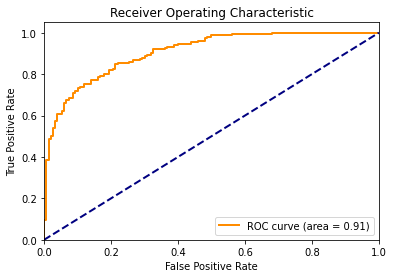

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.39733605213525447
Validation Loss: 0.44237451882944906
Training Time (seconds): 178.39525389671326
Inference Time (seconds): 11.532101392745972
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.81
Confusion Matrix:
 [[120  30]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       150
           1       0.80      0.82      0.81       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

ROC AUC Score: 0.9057333333333333
Metrics saved successfully


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9006 - loss: 0.2398 - val_accuracy: 0.7929 - val_loss: 0.4703
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9205 - loss: 0.2165 - val_accuracy: 0.8071 - val_loss: 0.5128
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9183 - loss: 0.1892 - val_accuracy: 0.7500 - val_loss: 0.5938
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9299 - loss: 0.1517 - val_accuracy: 0.7786 - val_loss: 0.5795
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9418 - loss: 0.1378 - val_accuracy: 0.7929 - val_loss: 0.5774
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9415 - loss: 0.1479 - val_accuracy: 0.7929 - val_loss: 0.6006
Training Time: 156.2852668762207 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


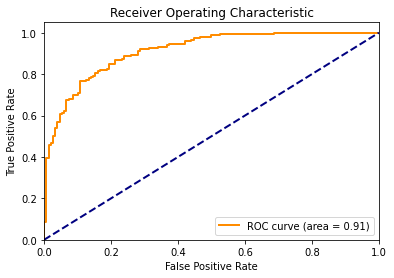

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.3873506548816214
Validation Loss: 0.4421416302547829
Training Time (seconds): 156.2852668762207
Inference Time (seconds): 11.465161323547363
Validation Accuracy: 0.7928571428571428
Test Accuracy: 0.8166666666666667
Confusion Matrix:
 [[121  29]
 [ 26 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       150
           1       0.81      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

ROC AUC Score: 0.9116
Metrics saved successfully


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9076 - loss: 0.2259 - val_accuracy: 0.7357 - val_loss: 0.5745
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9075 - loss: 0.2230 - val_accuracy: 0.8214 - val_loss: 0.4706
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9208 - loss: 0.2220 - val_accuracy: 0.7929 - val_loss: 0.5344
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9331 - loss: 0.1730 - val_accuracy: 0.7786 - val_loss: 0.5774
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9497 - loss: 0.1310 - val_accuracy: 0.7857 - val_loss: 0.5927
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9484 - loss: 0.1205 - val_accuracy: 0.8214 - val_loss: 0.5984
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9743 - loss: 0.0840 - val_accuracy: 0.7929 - val_loss: 0.6177
Training Time: 187.26181292533875 seconds


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


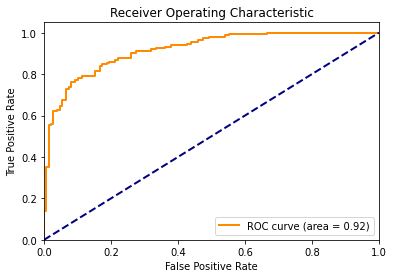

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Test Loss: 0.38069501685880663
Validation Loss: 0.44143014881117243
Training Time (seconds): 187.26181292533875
Inference Time (seconds): 11.479701519012451
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.8266666666666667
Confusion Matrix:
 [[116  34]
 [ 18 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       150
           1       0.80      0.88      0.84       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

ROC AUC Score: 0.9182222222222222
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")